In [3]:
import os
import sys
# CaLRepo = os.environ.get("CaLRepo")
CaLRepo ='/home/anoldfriend/Workspace/MyRepo/thermodynamics/CaL'
# print(CaLRepo)
sys.path.append(f"{CaLRepo}/utilities/")

import numpy as np
import pandas as pd
import proplot as pplot
from pyCaLPlant import CalcinerSide

In [4]:
parameters = dict()
flue_gas_composistion = dict()
flue_gas_composistion["co2"] = 0.1338
flue_gas_composistion["o2"] = 0.0384
flue_gas_composistion["n2"] = 0.6975
parameters["flue_gas_composition"] = flue_gas_composistion
parameters["isentropic_eff_mc"] = 0.87
parameters["mechanical_eff"] = 0.97
parameters["decarbonized_rate"] = 0.9
parameters["cao_conversion"] = 0.5
parameters["calciner_eff"] = 0.99
parameters["convey_consumption"] = 10e3/100
parameters["storage_carbonator_distance"] = 100
parameters["T_amb"] = 20
parameters["p_amb"] = 101325
parameters["T_calc"]=900
parameters["deltaTmin_SSHX"]=20
parameters["deltaTmin_SGHX"]=15
parameters["T_cooling_co2"]=20
parameters["p_co2_storage"]=75e5
parameters["n_compression"]=6
parameters["cooling_eff"]=0.01
calcs = CalcinerSide(parameters)


In [5]:
m = 57.23+29.21
mfrac = 57.23/m
results=calcs.calciner(m,mfrac)
results


{'mfrac': 0.66207774178621,
 'mass_camix_1': 57.23,
 'mass_camix_2': 29.210000000000004,
 'mass_cao_out': 57.5171102661597,
 'mass_co2_out': 28.922889733840304,
 'T_cao_o': 40,
 'T_co2_o': 91.80220961561679,
 'T_camix_1': 793.794691665132,
 'T_camix_2': 885,
 'T_camix_reactor_in': 824.6149954187356,
 'delta_H_Tcalc': 170584.76918679866,
 'Qe_calc': 121835973.26225258,
 'We_calc': 123066639.658841}

In [19]:
calcs.co2_multiple_stage_compressor(24.36,35,1e5,75e5,20,6)

{'compressor_power': -7015693.72477159, 'cooling_energy': 13287184.546236776}

In [15]:
inputs={}
inputs["mass_camix_in"]=57.23+29.21
inputs["mfrac"]=57.23/(57.23+29.21)
calcs.solve(inputs)

{'mfrac': 0.66207774178621,
 'mass_camix_1': 57.23,
 'mass_camix_2': 29.210000000000004,
 'mass_cao_out': 62.098496,
 'mass_CO2_out': 24.341503999999993,
 'T_cao_o': 40,
 'T_co2_o': 35,
 'T_camix_1': 861.0189858916551,
 'T_camix_2': 811.4525307434043,
 'T_camix_reactor_in': 844.2693774363057,
 'delta_H_Tcalc': 170584.76918679866,
 'Qe_calc': 101238679.33483726,
 'We_calc': 102261292.25741138,
 'compressor_power': -6985027.295221284,
 'cooling_energy': 13252237.540506149,
 'conveying_power': -1485384.9600000002,
 'cooling_power': -132522.3754050615,
 'calc_auxiliary_power': -8602934.630626345}

In [4]:
mfracs=np.arange(0.1,1,0.1)
all_results=[]
for mfrac in mfracs:
    # print(mfrac)
    results=calcs.calciner(m,mfrac)
    all_results.append(results)


In [5]:
df=pd.DataFrame(all_results)
df.head(10)

,mfrac,mass_camix_1,mass_camix_2,mass_cao_out,mass_CO2_out,T_cao_o,T_co2_o,T_camix_1,T_camix_2,T_camix_reactor_in,delta_H_Tcalc,Qe_calc,We_calc
0,0.1,8.644,77.796,62.098496,24.341504,772.225600,35.000000,880.000000,343.652878,397.287590,170584.769187,1.505488e+08,1.520695e+08
1,0.2,17.288,69.152,62.098496,24.341504,642.727002,35.000000,880.000000,380.910123,480.728098,170584.769187,1.421277e+08,1.435633e+08
2,0.3,25.932,60.508,62.098496,24.341504,511.351491,35.000000,880.000000,429.029237,564.320466,170584.769187,1.333292e+08,1.346760e+08
3,0.4,34.576,51.864,62.098496,24.341504,378.180621,35.000000,880.000000,490.762763,646.457658,170584.769187,1.243321e+08,1.255880e+08
4,0.5,43.220,43.220,62.098496,24.341504,242.562338,35.000000,880.000000,576.716903,728.358452,170584.769187,1.150142e+08,1.161759e+08
5,0.6,51.864,34.576,62.098496,24.341504,104.974778,35.000000,880.000000,700.633203,808.253281,170584.769187,1.055928e+08,1.066594e+08
6,0.7,60.508,25.932,62.098496,24.341504,40.000000,56.158228,820.468391,885.000000,839.827874,170584.769187,1.017793e+08,1.028073e+08
7,0.8,69.152,17.288,62.098496,24.341504,40.000000,372.487263,730.607942,885.000000,761.486354,170584.769187,1.111475e+08,1.122702e+08
8,0.9,77.796,8.644,62.098496,24.341504,40.000000,645.582341,660.081336,885.000000,682.573203,170584.769187,1.202657e+08,1.214805e+08


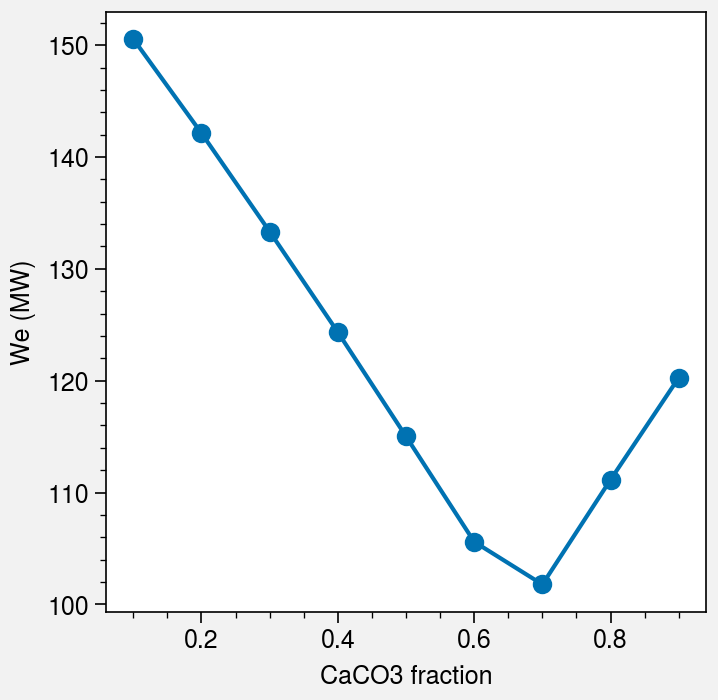

In [8]:
with pplot.rc.context({"grid": False}):
    fig, ax = pplot.subplots(aspect=(1, 1), axwidth=3)

    ax.plot(df["mfrac"],df["Qe_calc"]/1e6,linestyle="-",marker="o")

    ax.format(xlabel="CaCO3 fraction",ylabel="We (MW)")
    # ax.set_ylim([38,46.5])

    # fig.savefig("hot_water_Tw=80.jpg",bbox_inches='tight')